
# **【第3章】 データからわかることは？：探索的データ分析**

## 01 まずは、どんなデータなのかをざっくりと把握する

リスト3-1

In [ ]:
!pip install japanize-matplotlib
import pandas as pd
import numpy as np
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font=["IPAexGothic"])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 17.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=31310a1aa864893210caa460b804a22ef56a9870b2d5d19689f96f7234b5dc8f
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


リスト3-2

In [ ]:
data = {
    "年齢": [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
    "身長": [165, 170, 175, 168, 172, 178, 169, 173, 166, 171],
    "体重": [60, 65, 70, 75, 80, 85, 70, 75, 68, 72],
    "血圧": [110, 115, 120, 125, 130, 135, 140, 145, 130, 135],
    "性別": ["男", "女", "男", "女", "男", "女", "男", "女", "男", "女"],
    "運動頻度": ["低", "高", "中", "高", "低", "高", "中", "高", "低", "中"]
}
df = pd.DataFrame(data)
df.head()

,年齢,身長,体重,血圧,性別,運動頻度
0,25,165,60,110,男,低
1,30,170,65,115,女,高
2,35,175,70,120,男,中
3,40,168,75,125,女,高
4,45,172,80,130,男,低


リスト3-3

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   年齢      10 non-null     int64 
 1   身長      10 non-null     int64 
 2   体重      10 non-null     int64 
 3   血圧      10 non-null     int64 
 4   性別      10 non-null     object
 5   運動頻度    10 non-null     object
dtypes: int64(4), object(2)
memory usage: 608.0+ bytes


リスト3-4

In [ ]:
df.describe()

,年齢,身長,体重,血圧
count,10.000000,10.000000,10.000000,10.000000
mean,47.500000,170.700000,72.000000,128.500000
std,15.138252,4.001389,7.211103,11.067972
min,25.000000,165.000000,60.000000,110.000000
25%,36.250000,168.250000,68.500000,121.250000
50%,47.500000,170.500000,71.000000,130.000000
75%,58.750000,172.750000,75.000000,135.000000
max,70.000000,178.000000,85.000000,145.000000


## 02 データのばらつきを理解したいとき


リスト3-5

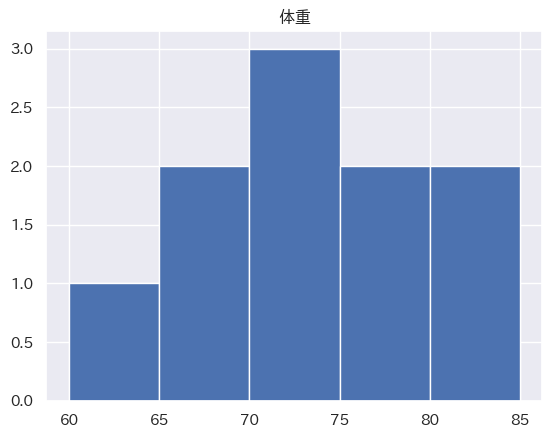

In [ ]:
df["体重"].hist(bins=5)
plt.title("体重")
plt.show()

リスト3-6

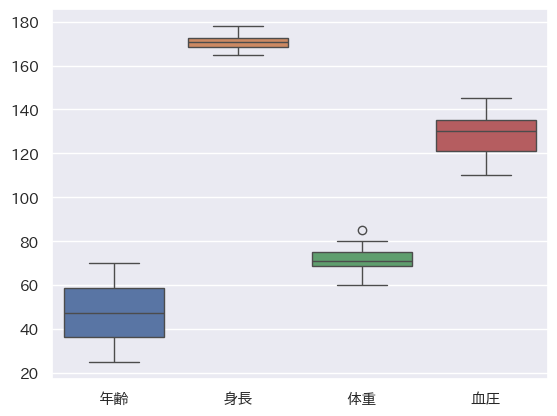

In [ ]:
sns.boxplot(data=df[["年齢", "身長", "体重", "血圧"]])
plt.show()

リスト3-7

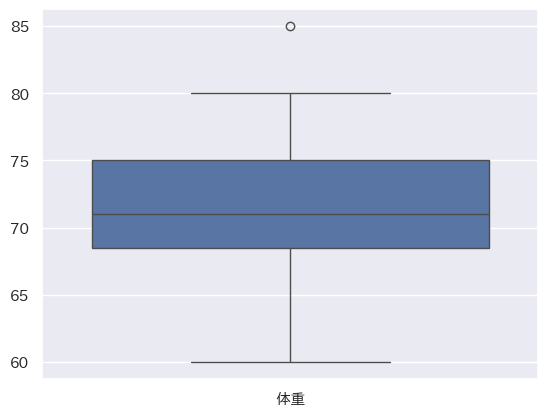

In [ ]:
sns.boxplot(data=df[["体重"]])
plt.show()

リスト3-8

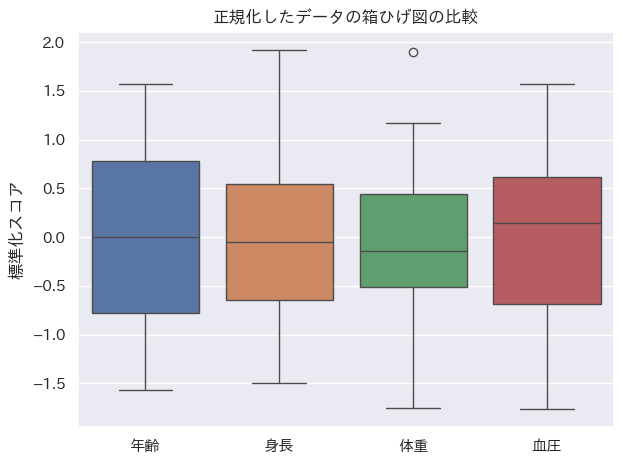

In [ ]:
from sklearn.preprocessing import StandardScaler

# データの標準化
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[["年齢", "身長", "体重", "血圧"]])
normalized_df = pd.DataFrame(normalized_data, columns=["年齢", "身長", "体重", "血圧"])

# 正規化したデータの箱ひげ図の比較
sns.boxplot(data=normalized_df)
plt.title("正規化したデータの箱ひげ図の比較")
plt.ylabel("標準化スコア")
plt.tight_layout()
plt.show()

リスト3-9

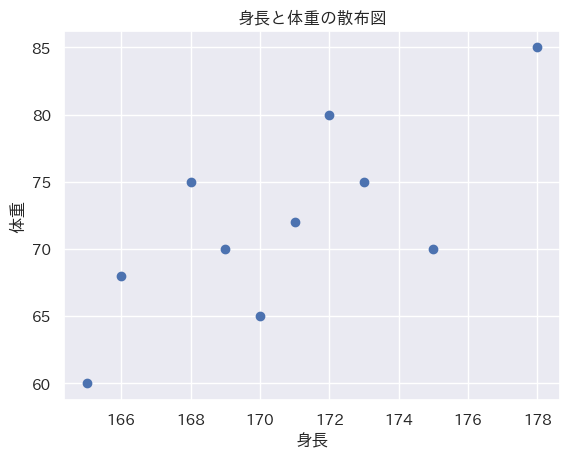

In [ ]:
plt.scatter(df["身長"], df["体重"])
plt.title("身長と体重の散布図")
plt.xlabel("身長")
plt.ylabel("体重")
plt.show()

## 03 複数の項目の関係性を探りたいとき


リスト3-10

In [ ]:
df[["身長","体重"]].corr()

,身長,体重
身長,1.000000,0.735493
体重,0.735493,1.000000


リスト3-11

In [ ]:
df[["年齢", "身長", "体重", "血圧"]].corr()

,年齢,身長,体重,血圧
年齢,1.000000,0.114644,0.366423,0.837231
身長,0.114644,1.000000,0.735493,0.377585
体重,0.366423,0.735493,1.000000,0.612548
血圧,0.837231,0.377585,0.612548,1.000000


リスト3-12

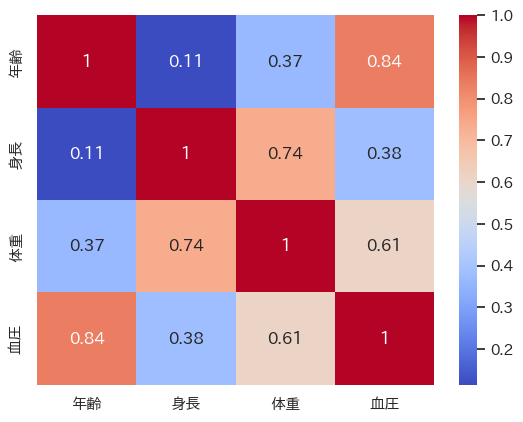

In [ ]:
corr = df[["年齢", "身長", "体重", "血圧"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

リスト3-13

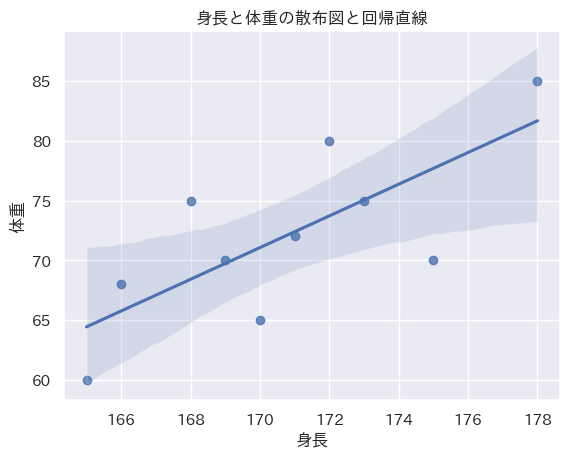

In [ ]:
sns.regplot(x="身長", y="体重", data=df)
plt.title("身長と体重の散布図と回帰直線")
plt.show()

## 04 2つのカテゴリーの関係性を探りたいとき


リスト3-14

In [ ]:
cross_tab = pd.crosstab(df["性別"], df["運動頻度"])
cross_tab = cross_tab[["低", "中", "高"]]
cross_tab

運動頻度,低,中,高
性別,,,
女,0,1,4
男,3,2,0
